In [1]:
#import the libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import read_csv
from pandas import set_option

#### Load the data

In [3]:
# Load CSV using Pandas
data = read_csv('dataframe_.csv')
print(data.shape)

(1697, 2)


#### Desrciptive Stats

In [4]:
# Data Types for Each Attribute
types = data.dtypes
print(types)

input     float64
output    float64
dtype: object


In [5]:
# Statistical Summary


description = data.describe()
print(description)

             input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495


In [6]:
# Pairwise Pearson correlations
correlations = data.corr(method='kendall')
print(correlations)

           input    output
input   1.000000  0.389854
output  0.389854  1.000000


In [7]:
# Class proportion
class_counts = data.groupby('output').size()
print(class_counts)

output
-132.422167    2
-132.032206    2
-130.572085    2
-130.141832    2
-129.938929    2
              ..
 132.055270    2
 132.424802    1
 133.579278    1
 133.793116    2
 134.425495    1
Length: 969, dtype: int64


#### Data Visualization

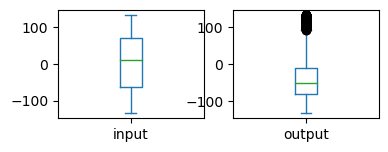

In [8]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

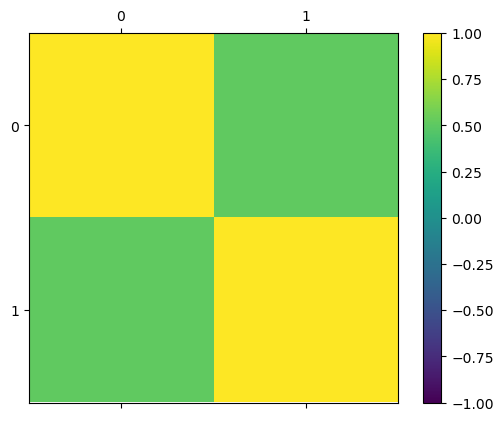

In [9]:
# Correction Matrix Plot (generic)
from matplotlib import pyplot
from pandas import read_csv
import numpy

correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111) #"111" means "1x1 grid, first subplot" 
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()


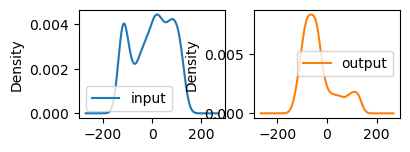

In [10]:
# Univariate Density Plots
from matplotlib import pyplot
from pandas import read_csv

data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

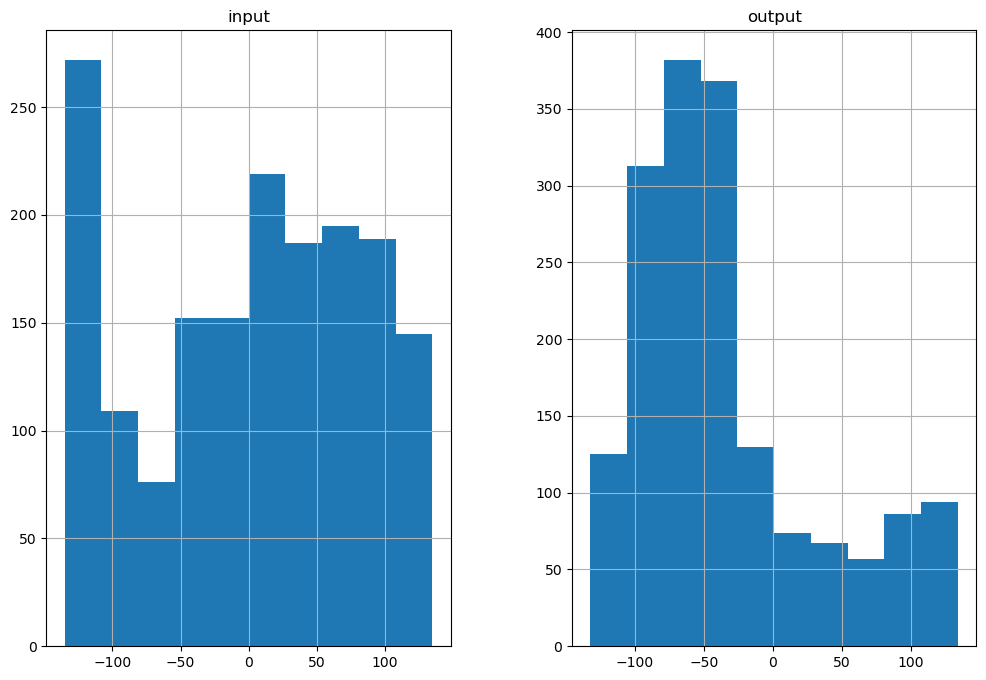

In [11]:
# Univariate Histograms
from matplotlib import pyplot
from pandas import read_csv

data.hist(figsize=(12, 8))
pyplot.show()

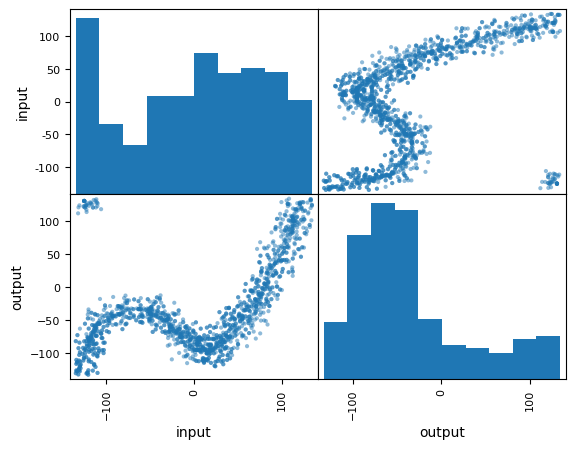

In [12]:

# Scatterplot Matrix
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix

scatter_matrix(data)
pyplot.show()

#### Data Rescaling

In [13]:
# Rescale data (between x and y)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
data = read_csv('dataframe_.csv')



array = data.values
# separate array into input and output components
X = array[:,0:2]
Y = array[:,1]

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.05 0.01]
 [0.05 0.01]
 [0.   0.01]
 [0.05 0.02]
 [0.02 0.07]]


#### Data Standardization

In [14]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
dataframe = read_csv('dataframe_.csv')
array = dataframe.values
# separate array into input and output components
X = array[:,0:2]
Y = array[:,1]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-1.569 -1.467]
 [-1.553 -1.458]
 [-1.723 -1.461]
 [-1.542 -1.394]
 [-1.659 -1.197]]


In [15]:
data.fillna(value = 0, inplace = True)
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


#### Feature Engineering- Method1

In [16]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
dataframe = read_csv('dataframe_.csv')


array = data.values
X = array[:,0:2]
Y = array[:,1]


# feature extraction
model = LogisticRegression()


rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)

fit.n_features_
fit.support_
fit.ranking_

ValueError: Unknown label type: 'continuous'

#### Feature Engineering- Method2

In [17]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
data= read_csv('dataframe_.csv')

array = data.values
X = array[:,0:2]
Y = array[:,1]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)

print(model.feature_importances_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

#### Model Validation Methods

In [18]:
# Evaluate using a train test split method
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
dataframe = read_csv('dataframe_.csv')

array = data.values
X = array[:,0:2]
Y = array[:,1]

test_size = 0.33
seed = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)


result = model.score(X_test, Y_test)

result*100.0


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [19]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
dataframe = read_csv('dataframe_.csv')
array = data.values
X = array[:,0:2]
Y = array[:,1]

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=kfold)

#Print results

results.mean()*100.0
results.std()*100.0


C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vamsi\anaconda3\l

nan

#### Accuracy Methods

In [20]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
dataframe = read_csv('dataframe_.csv')
array = data.values
X = array[:,0:2]
Y = array[:,1]

kfold = KFold(n_splits=10)
model = LogisticRegression(max_iter=500)

scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)


results.mean()
results.std()

C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vamsi\anaconda3\l

nan

In [21]:
# Cross Validation Classification Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score #The F1 score can be interpreted as a weighted average of the precision and recall
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = data.values
X = array[:,0:2]
Y = array[:,1]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

#F1 score
matrix = f1_score(Y_test, predicted)
matrix

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Model Building

In [22]:
# CART Classification

dataframe.dropna()
dataframe.drop_duplicates()
dataframe.fillna(value = 0, inplace = True)


from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
data = read_csv('dataframe_.csv')

array = data.values
X = array[:,0:1]
Y = array[:,1]

kfold = KFold(n_splits=10)

model = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model = DecisionTreeClassifier()
dt=model.fit(X,Y)

nan


C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 165, in fit
    X, y = self._validate_data(
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\base.py", lin

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [23]:
# Gaussian Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

nan


C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 244, in fit
    y = self._validate_data(y=y)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\base.py", line 569, in _validate_data
    y = _check_y(y, **check_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\s

In [24]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())


nan


C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  

In [25]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


nan


C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packag

In [26]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10

kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

nan


C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 116, in fit
    X, y = self._validate_data(
  File "C:\Users\vams

In [27]:
# Bagged Decision Trees for Classification

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [28]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

X = array[:,0:8]
Y = array[:,8]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


IndexError: index 8 is out of bounds for axis 1 with size 2

In [29]:
# Voting Ensemble for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

nan


C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 309, in fit
    check_classification_targets(y)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 189, in check_classification_targets
    y_type = type_of_target(y)
  File "C:\Users\vamsi\

#### Compare the algorithms

In [30]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.776042 (0.051575)
KNN: 0.726555 (0.061821)
CART: 0.693934 (0.052831)
NB: 0.755178 (0.042766)


C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

SVM: 0.760424 (0.052931)


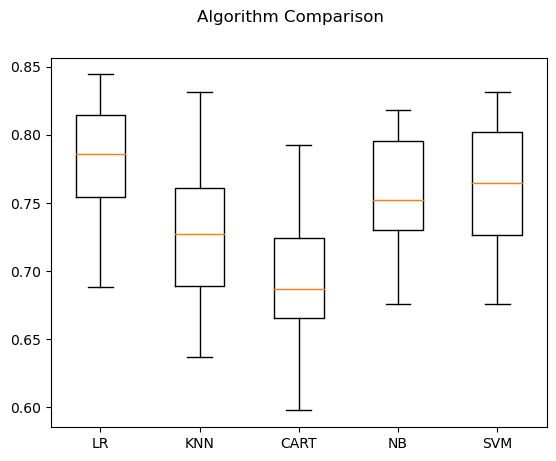

In [31]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### ML Pipelines

In [32]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# load data
dataframe = read_csv('dataframe_.csv')
array = dataframe.values
X = array[:,0:2]
Y = array[:,1]

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('log', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

nan


C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\vamsi\

In [33]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
dataframe = read_csv('dataframe_.csv')
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(max_iter=300)))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


nan


C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\vamsi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\vamsi\anaconda

In [34]:
# Save Model Using Pickle and load and predict
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
dataframe = read_csv('dataframe_.csv')
array = dataframe.values
X = array[:,0:1]
Y = array[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open('filename', 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open('filename', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').